#**1. Thiết lập các thư viện về PhoBERT**





Để load model PhoBERT chúng ta sẽ cần cài đặt các packages sau đây:

*   fairseq: Là project của facebook chuyên hỗ trợ các nghiên cứu và dự án liên quan đến model seq2seq.
*   fastBPE: Là package hỗ trợ tokenize từ (word) thành các từ phụ (subwords) theo phương pháp mới nhất được áp dụng cho các pretrain model NLP hiện đại như BERT và các biến thể của BERT.
*   vncorenlp: Là một package NLP trong Tiếng Việt, hỗ trợ tokenize và các tác vụ NLP khác.
*  transformers: Là một project của huggingface hỗ trợ huấn luyện các model dựa trên kiến trúc transformer như BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet, T5, CTRL,... phục vụ cho các tác vụ NLP trên cả nền tảng pytorch và tensorflow.

In [ ]:
!pip3 install transformers
!pip3 install fairseq
!pip3 install fastbpe
!pip3 install vncorenlp
!pip3 install fastBPE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download các model pretrain từ PhoBERT.

Ở đồ án này sử dụng pretrain model BERT base được huấn luyện từ package fairseq.

Sau khi download và giải nén pretrain file chúng ta sẽ kiểm tra thấy bên trong folder sẽ bao gồm 3 files đó là `bpe.codes, dict.txt, model.pt`,có tác dụng như sau:

*   bpe.codes: Là BPE token mà mô hình đã áp dụng để mã hóa văn bản sang index.
*   dict.txt: Từ điển của bộ dữ liệu huấn luyện.
*   model.pt: File lưu trữ của mô hình trên pytorch

In [ ]:
!wget https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
!tar -xzvf PhoBERT_base_fairseq.tar.gz

--2022-12-21 13:18:51--  https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
Resolving public.vinai.io (public.vinai.io)... 18.160.41.104, 18.160.41.47, 18.160.41.51, ...
Connecting to public.vinai.io (public.vinai.io)|18.160.41.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1243308020 (1.2G) [application/x-tar]
Saving to: ‘PhoBERT_base_fairseq.tar.gz.1’

PhoBERT_base_fairse 100%[===================>]   1.16G  96.4MB/s    in 11s     

2022-12-21 13:19:03 (109 MB/s) - ‘PhoBERT_base_fairseq.tar.gz.1’ saved [1243308020/1243308020]

PhoBERT_base_fairseq/
PhoBERT_base_fairseq/bpe.codes
PhoBERT_base_fairseq/model.pt
PhoBERT_base_fairseq/dict.txt


Tải model từ fairseq

In [ ]:
from fairseq.models.roberta import RobertaModel
phoBERT = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file='model.pt')

Tải pre-trained của PhoBERT.

In [ ]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2022-12-21 13:19:47--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 18.160.41.77, 18.160.41.104, 18.160.41.51, ...
Connecting to public.vinai.io (public.vinai.io)|18.160.41.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz.1’

PhoBERT_base_transf 100%[===================>] 307.47M  58.0MB/s    in 3.9s    

2022-12-21 13:19:51 (78.7 MB/s) - ‘PhoBERT_base_transformers.tar.gz.1’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


PhoBERT base transformers 4 file nhỏ bao gồm:
*   `config.json` chứa config của model.
*   `model.bin` lưu trữ pre-trained weight của model.
*   `bpe.codes` và `dict.txt` chứ từ điển sẵn có của PhoBERT.

In [ ]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq import options
from fairseq.data import Dictionary
# Load the model in fairseq
from fairseq.models.roberta import RobertaModel

phoBERT_cls = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file='model.pt')
phoBERT_cls.eval()  # disable dropout (or leave in train mode to finetune

# Load BPE
class BPE():
  bpe_codes = 'PhoBERT_base_fairseq/bpe.codes'

args = BPE()
phoBERT_cls.bpe = fastBPE(args) #Incorporate the BPE encoder into PhoBERT

Download package VnCoreNLP

In [ ]:
# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter)
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2022-12-21 13:20:19--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.08s   

2022-12-21 13:20:19 (336 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-12-21 13:20:19--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

#**2. Cài đặt các thư viện**

In [ ]:
import numpy as np
import pandas as pd
import torch
import regex
import re
from tqdm import tqdm
import torch
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**3. Tải dữ liệu**
Bộ dữ liệu được thu thập ở Kaggle: https://www.kaggle.com/code/linhlpv/vietnamese-sentiment-analyst-base/data

In [ ]:
def get_data(path):
    df = pd.read_csv('/content/data - data.csv')
    df.columns = ['comment', 'label', 'rate', 'unnamed']
    # unused column
    df.drop(columns=['unnamed'], inplace=True)
    return df

In [ ]:
df = get_data('/content/data - data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  31460 non-null  object
 1   label    31460 non-null  object
 2   rate     31460 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 737.5+ KB


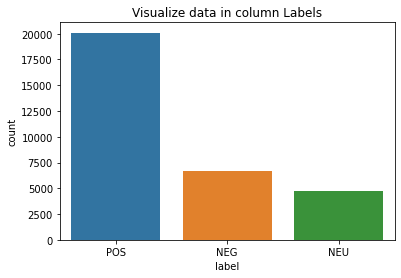

In [ ]:
ax = sns.countplot(x='label', data=df).set(title='Visualize data in column Labels')

# **4.Tiền xử lý dữ liệu**

Thực biện tách từ, xoá các kí tự thừa, loại bỏ các stopword

In [ ]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

stopword = set()
with open('/content/stopwords.txt', 'r', encoding='utf-8') as _fp:
    word = _fp.readlines()
stopword = [n.replace('\n', '') for n in word]

def remove_stopwords(tokenized_column):
    stops = stopword
    return [word for word in tokenized_column if not word in stops]

def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))

In [ ]:
df['tokenized'] = df.apply(lambda x: tokenize(x['comment']), axis=1)
df['stopwords_removed'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
df['Sentence'] = df.apply(lambda x: rejoin_words(x['stopwords_removed']), axis=1)

Xoá bỏ các cột thừa sao khi tiền xử lý dữ liệu

In [ ]:
df.drop(columns=['comment'], inplace=True)
df.drop(columns=['tokenized'], inplace=True)
df.drop(columns=['stopwords_removed'], inplace=True)
df.drop(columns=['rate'], inplace=True)

In [ ]:
df

,label,Sentence
0,POS,Áo bao đẹp
1,POS,Tuyệt vời
2,NEG,ao khong giong
3,POS,Mùi thơm bôi da mềm da
4,POS,Vải đẹp dày dặn
...,...,...
31455,NEG,Không tiền
31456,POS,Quần đẹp
31457,POS,Hàng đẹp giá tiền
31458,POS,Chất vải ổn


Chia dữ liệu thành 3 tập Train, Test, Valid để huấn luyện mô hình

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'],
                                                    df['label'],
                                                    test_size = .15,
                                                    shuffle = True,
                                                    stratify=df['label'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = .2,
                                                      shuffle = True,
                                                      stratify=y_train)

# **5. Trích suất đặt trưng**

#### PhoBERT

Tokenize các câu văn sang chuỗi index và padding câu văn về cũng một độ dài.

In [ ]:
# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/PhoBERT_base_transformers/dict.txt")

In [ ]:
max_sequence_length = 256
def convert_lines(lines, vocab, bpe):
  '''
  lines: list các văn bản input
  vocab: từ điển dùng để encoding subwords
  bpe:
  '''
  # Khởi tạo ma trận output
  outputs = np.zeros((len(lines), max_sequence_length), dtype=np.int32) # --> shape (number_lines, max_seq_len)
  # Index của các token cls (đầu câu), eos (cuối câu), padding (padding token)
  cls_id = 0
  eos_id = 2
  pad_id = 1

  for idx, row in tqdm(enumerate(lines), total=len(lines)):
    # Mã hóa subwords theo byte pair encoding(bpe)
    subwords = bpe.encode('<s> '+ row +' </s>')
    input_ids = vocab.encode_line(subwords, append_eos=False, add_if_not_exist=False).long().tolist()
    # Truncate input nếu độ dài vượt quá max_seq_len
    if len(input_ids) > max_sequence_length:
      input_ids = input_ids[:max_sequence_length]
      input_ids[-1] = eos_id
    else:
      # Padding nếu độ dài câu chưa bằng max_seq_len
      input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))

    outputs[idx,:] = np.array(input_ids)
  return outputs

Trích đặt trưng cho tập Train, Test, Valid.

In [ ]:
X_train_pho = convert_lines(X_train,vocab, phoBERT_cls.bpe)
X_test_pho = convert_lines(X_test, vocab, phoBERT_cls.bpe)
X_valid_pho = convert_lines(X_valid, vocab, phoBERT_cls.bpe)

100%|██████████| 5349/5349 [00:00<00:00, 7917.68it/s]


Chuẩn hoá các nhãn về dạng số, và đổi kích thước nhãn

In [ ]:
# lb = LabelEncoder()
# lb.fit(df['label'])
# y_train = lb.fit_transform(y_train)
# y_test = lb.fit_transform(y_test)
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)
# print(lb.classes_)
# print('Top 5 classes indices: ', y_train[:5])

# **6. Mô Hình học máy**

## **6.1 Support Vector Machine - SVM**

###Hyper Parameter Tuning

In [ ]:
SVM = SVC(C = 1, kernel='rbf', gamma=1)
SVM.fit(X_train_pho, y_train)

y_pred_SVM = SVM.predict(X_test_pho)

In [ ]:
a = accuracy_score(y_pred_SVM, y_test)
print("Validation accuracy: ", a*100)

Validation accuracy:  65.73426573426573


## **6.2 K-nearest neighbor - KNN**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 100, metric='minkowski', p = 2)
KNN.fit(X_train_pho, y_train)

y_pred_KNN = KNN.predict(X_test_pho)

In [ ]:
b = accuracy_score(y_pred_KNN, y_test)
print("Validation accuracy: ", b*100)

Validation accuracy:  63.65755456664548



## **6.4 Random Forest**

In [ ]:
RF=RandomForestClassifier(n_estimators=300)
RF.fit(X_train_pho,y_train)

y_pred_RF = RF.predict(X_test_pho)

In [ ]:
c = accuracy_score(y_pred_RF, y_test)
print("Validation accuracy: ", c*100)

Validation accuracy:  66.56071201525748


# **7. Đánh giá**

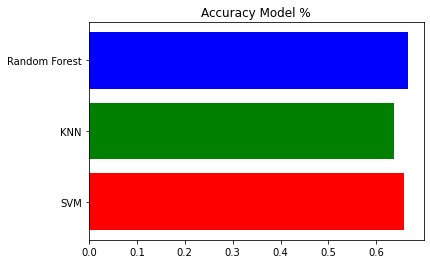

In [ ]:
# Accuracy
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["SVM", "KNN", "Random Forest" ])
y = np.array([a, b, c])
plt.title('Accuracy Model %')
plt.barh(x, y, color=['red', 'green', 'blue'])
plt.show()

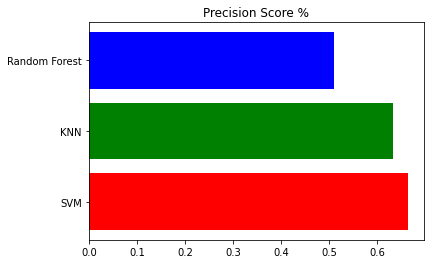

In [ ]:
# precision score
a = precision_score(y_test, y_pred_KNN, average="macro")
b = precision_score(y_test, y_pred_SVM, average="macro")
c = precision_score(y_test, y_pred_RF, average="macro")
x = np.array(["SVM", "KNN", "Random Forest" ])
y = np.array([a, b, c])
plt.title('Precision Score %')
plt.barh(x, y, color=['red', 'green', 'blue'])
plt.show()

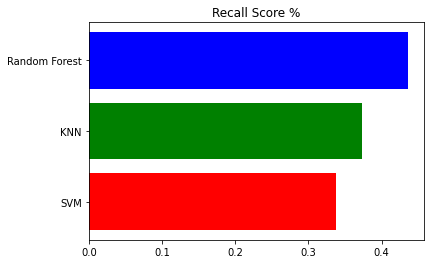

In [ ]:
# Recall Score
a = recall_score(y_test, y_pred_KNN, average="macro")
b = recall_score(y_test, y_pred_SVM, average="macro")
c = recall_score(y_test, y_pred_RF, average="macro")
x = np.array(["SVM", "KNN", "Random Forest"])
y = np.array([a, b, c])
plt.title('Recall Score %')
plt.barh(x, y, color=['red', 'green', 'blue'])
plt.show()

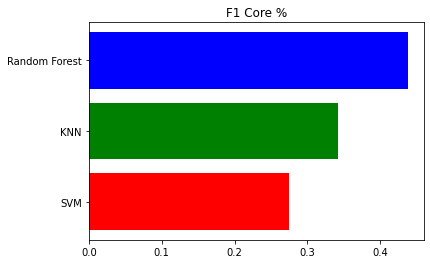

In [ ]:
# F1 Core
a = f1_score(y_test, y_pred_KNN, average="macro")
b = f1_score(y_test, y_pred_SVM, average="macro")
c = f1_score(y_test, y_pred_RF, average="macro")
x = np.array(["SVM", "KNN", "Random Forest"])
y = np.array([a, b, c])
plt.title('F1 Core %')
plt.barh(x, y, color=['red', 'green', 'blue'])
plt.show()

#**8. Dự đoán**

In [ ]:
def pred_val(model, text):
  predict_valid = model.predict(text)
  return predict_valid

##**8.1 Dự đoán trên tập Valid**

In [ ]:
predict_lab_KNN = pred_val(KNN, X_valid_pho)
predict_lab_SVM = pred_val(SVM, X_valid_pho)
predict_lab_RF = pred_val(RF, X_valid_pho)

In [ ]:
predict_lab_KNN = predict_lab_KNN.reshape(-1,1)
predict_lab_SVM = predict_lab_SVM.reshape(-1,1)
predict_lab_RF = predict_lab_RF.reshape(-1,1)

In [ ]:
df_predict =  np.concatenate((np.array(X_valid).reshape(-1, 1),
                                   np.array(y_valid).reshape(-1, 1),
                                   np.array(predict_lab_KNN).reshape(-1, 1),
                                   np.array(predict_lab_SVM).reshape(-1, 1),
                                   np.array(predict_lab_RF).reshape(-1, 1)), axis=-1)

In [ ]:
valid_concat_predict_df = pd.DataFrame(df_predict,
columns=['comment', 'True_Label', 'Predict KNN', 'Predict SVM', 'Predict RF'])

In [ ]:
valid_concat_predict_df[450:500]

,comment,True_Label,Predict KNN,Predict SVM,Predict RF
450,Chất,POS,POS,POS,POS
451,Đóng gói siêu sp hình,POS,POS,POS,POS
452,Chưa chất đóng gói sp,POS,POS,POS,POS
453,Len mềm mịn hơi mỏng,POS,POS,POS,POS
454,Max đẹp Chất sản phẩm tuyệt vời Đóng gói sản p...,POS,POS,POS,POS
455,Áo chất siêu,POS,POS,POS,NEG
456,Ưng lắm,POS,POS,POS,POS
457,Chất phục vụ kém,NEG,POS,POS,NEG
458,Dáng đẹp,POS,POS,POS,POS
459,Đai thắt lưng k hình,NEG,POS,POS,NEG


##**8.2 Dự đoán text**

In [ ]:
text=('khá là thất vọng')

In [ ]:
text = 'sản phẩm không tuyệt vời như mình nghĩ'

In [ ]:
# text = input('Input text to predict lable: ')

In [ ]:
text_w = word_tokenize(text)
text_w
filtered_sentence = [w for w in text_w if not w.lower() in stopword]
filtered_sentence = []
for w in text_w :
    if w not in stopword:
        filtered_sentence.append(w)
filtered_sentence = " ".join(filtered_sentence)

In [ ]:
text = np.array([filtered_sentence],dtype=object)
text = convert_lines(text, vocab, phoBERT_cls.bpe)
print('\nKNN predict: ', pred_val(KNN, text))
print('\nSVM predict: ', pred_val(SVM, text))
print('\nRandom Forest predict: ', pred_val(RF, text))

100%|██████████| 1/1 [00:00<00:00, 276.07it/s]


KNN predict:  ['POS']

SVM predict:  ['POS']

Random Forest predict:  ['POS']
